In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [220]:
df = pd.read_csv("drive/MyDrive/Algoritmos-AM-e-RN/MachineLearning/Projeto02- Linkedin- Regressão Logistica/LoanPredict/Dados/madfhantr.csv",sep=',',encoding='iso-8859-1')

In [221]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [222]:
df.shape

(614, 13)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [224]:
df.drop('Loan_ID',axis=1,inplace = True)

Excluindo Temporariamente linhas com valores nulos

# Tratando os dados Categóricos e entendendo-se cada uma deles

In [225]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


In [226]:
df.loc[:,'Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

Como não há informações de quantos filhos é depois de +3, será fechado em 3 filhos

In [227]:
df['Dependents'] = df['Dependents'].replace("3+",3)
df['Dependents'] = df['Dependents'].astype(int)

In [228]:
df['Dependents'].unique()

array([1, 0, 2, 3])

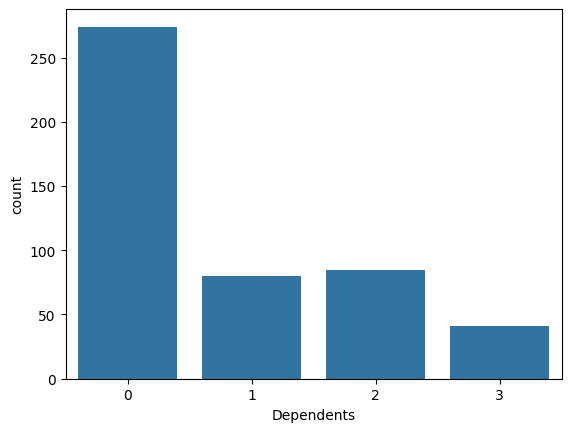

In [229]:
sns.countplot( x = df['Dependents'])
plt.show()

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    int64  
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 48.8+ KB


*Gender

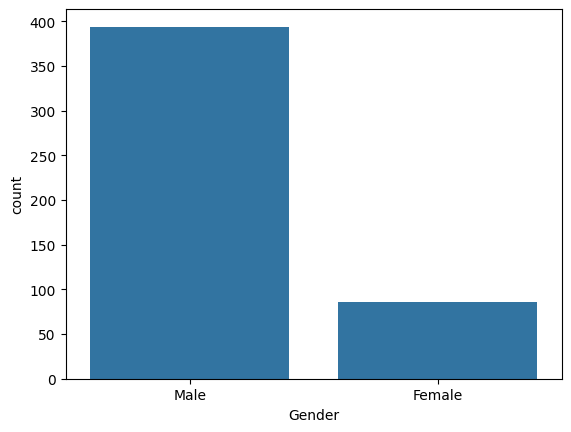

In [231]:
sns.countplot( x = df['Gender'])
plt.show()

In [232]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [233]:
df['Gender'].unique()

array([1, 0])

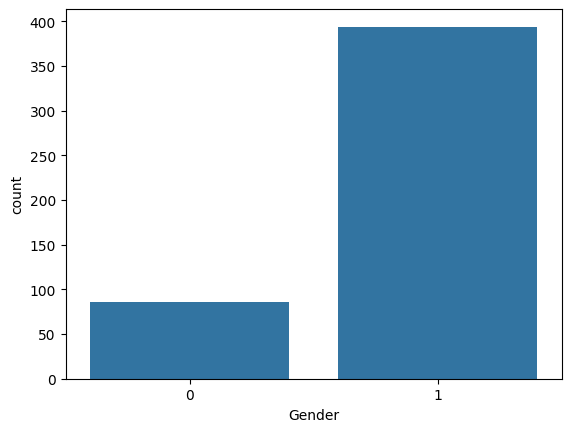

In [234]:
sns.countplot( x = df['Gender'])
plt.show()

0 - Female, 1 - Male

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    int64  
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 48.8+ KB


*Married

In [236]:
df['Married'].unique()

array(['Yes', 'No'], dtype=object)

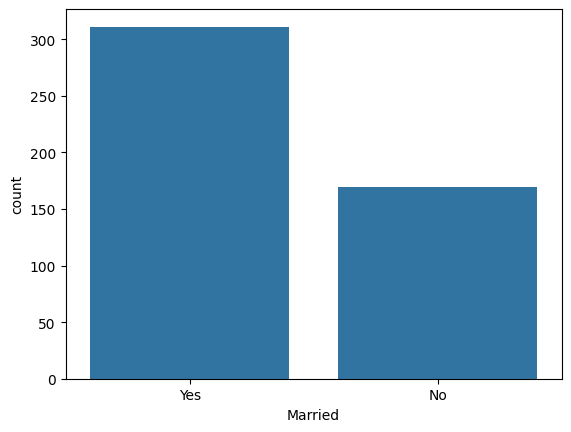

In [237]:
sns.countplot( x = df['Married'])
plt.show()

In [238]:
df['Married'] = label_encoder.fit_transform(df['Married'])

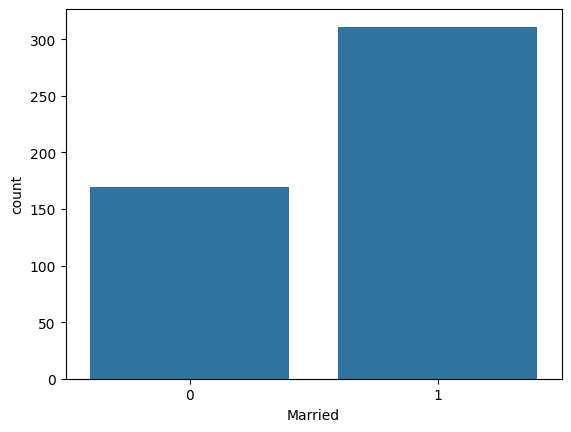

In [239]:
sns.countplot( x = df['Married'])
plt.show()

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    int64  
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(4), object(4)
memory usage: 48.8+ KB


* 1 - Married
* 0 - No Married

* Education

In [241]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

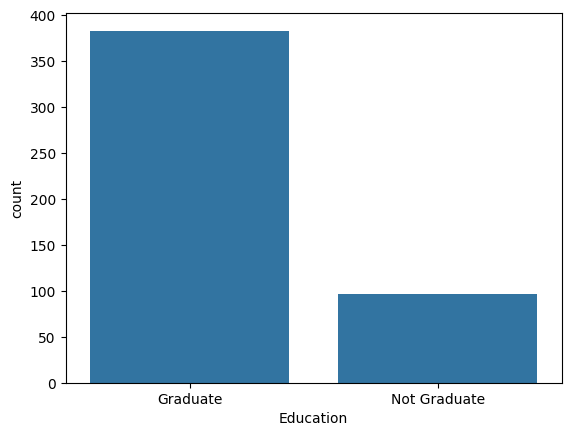

In [242]:
sns.countplot( x = df['Education'])
plt.show()

In [243]:
df['Education'] = label_encoder.fit_transform(df['Education'])

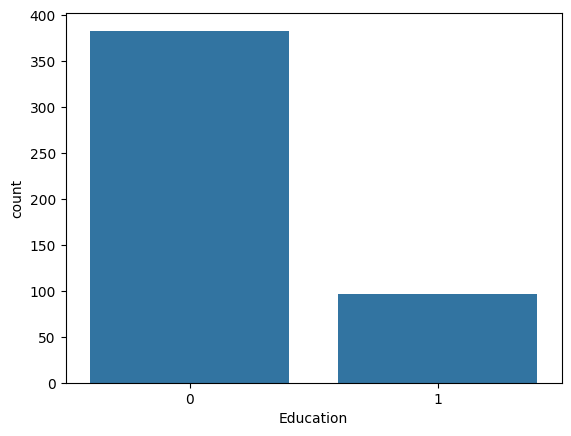

In [244]:
sns.countplot( x = df['Education'])
plt.show()

* 0 - Graduate
* 1 - Not Graduate

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    int64  
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(5), object(3)
memory usage: 48.8+ KB


* Self_Employed

* Trabalhadores por conta própria, ou autônomos, prestam serviços sem vínculo empregatício formal, o que lhes dá flexibilidade e autonomia, mas também maior responsabilidade. Eles definem seus horários e escolhem os projetos, mas enfrentam incertezas financeiras e não têm benefícios tradicionais como férias ou plano de saúde. Profissões comuns incluem freelancers, profissionais liberais e prestadores de serviços técnicos. Vantagens incluem liberdade e potencial de altos ganhos, enquanto as desvantagens envolvem instabilidade e encargos financeiros. Ferramentas como plataformas de freelancer e softwares de gestão ajudam a facilitar o trabalho.

In [246]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

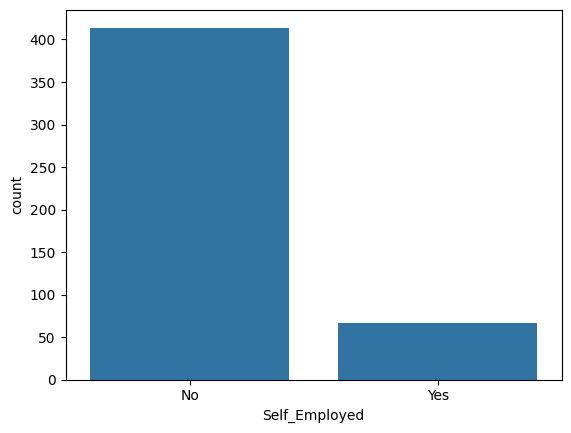

In [247]:
sns.countplot( x = df['Self_Employed'])
plt.show()

In [248]:
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])

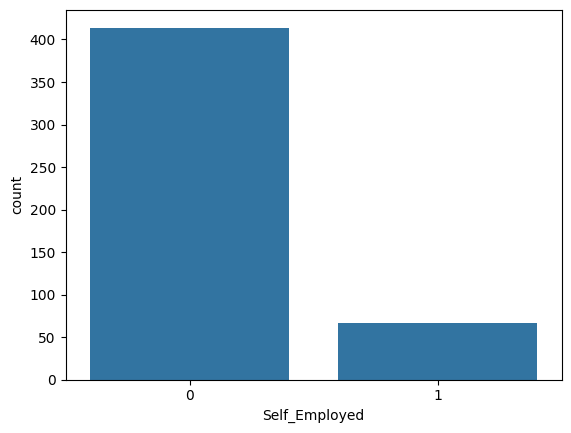

In [249]:
sns.countplot( x = df['Self_Employed'])
plt.show()

* 0 - dont works for himself
* 1 - works for himself

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    int64  
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    int64  
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(6), object(2)
memory usage: 48.8+ KB


* Property_Area

In [251]:
df['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

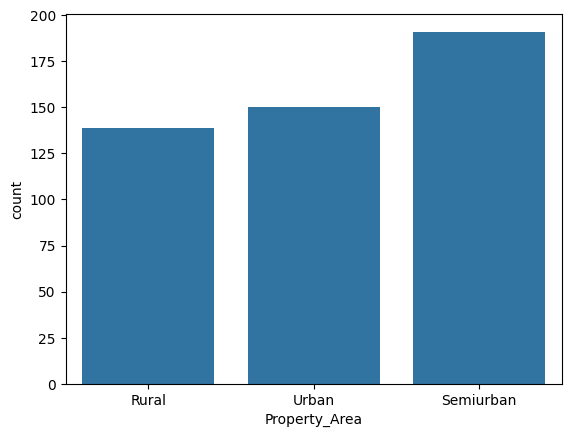

In [252]:
sns.countplot(x=df['Property_Area'])
plt.show()

ONE HOT ENCODER

In [253]:
df = (pd.get_dummies(df , columns = ['Property_Area'],prefix='',prefix_sep=''))

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    int64  
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    int64  
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Loan_Status        480 non-null    object 
 11  Rural              480 non-null    bool   
 12  Semiurban          480 non-null    bool   
 13  Urban              480 non-null    bool   
dtypes: bool(3), float64(4), int64(6), object(1)
memory usage: 46.4+ KB


In [255]:
df.iloc[:,11:14] = df.iloc[:,11:14].astype(int)

<ipython-input-255-8d889d849a4c>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1      1
2      0
3      0
4      0
5      0
      ..
609    1
610    1
611    0
612    0
613    0
Name: Rural, Length: 480, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.iloc[:,11:14] = df.iloc[:,11:14].astype(int)
<ipython-input-255-8d889d849a4c>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1      0
2      0
3      0
4      0
5      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Semiurban, Length: 480, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.iloc[:,11:14] = df.iloc[:,11:14].astype(int)
<ipython-input-255-8d889d849a4c>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of

In [256]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,N,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Y,0,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Y,0,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Y,0,0,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,Y,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,Y,1,0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,Y,1,0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,Y,0,0,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,Y,0,0,1


*Loan_Status

In [257]:
df['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

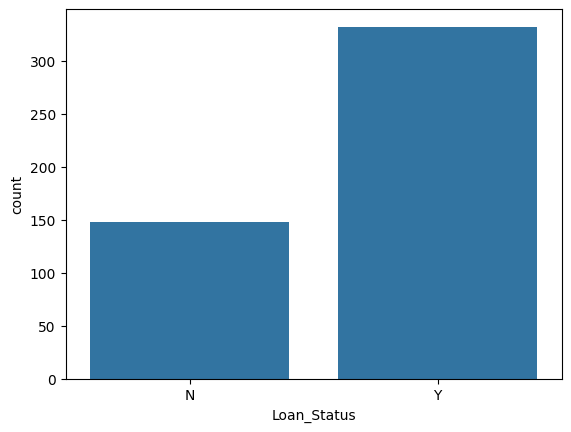

In [258]:
sns.countplot(x=df['Loan_Status'])
plt.show()

In [259]:
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])

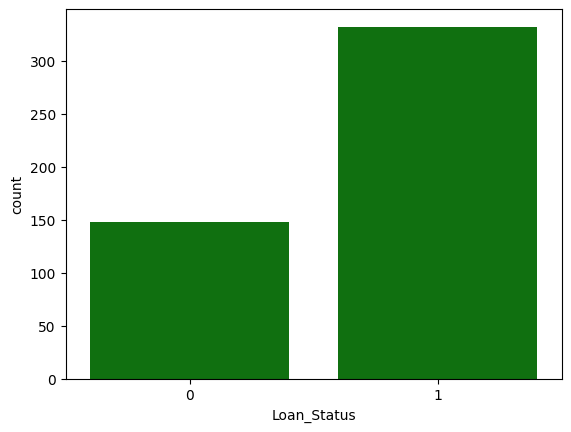

In [260]:
sns.countplot(x=df['Loan_Status'], color = 'green')
plt.show()

Conjunto de rótulos de empréstimos não está balanceado, assim podendo provacar um enviseamento no modelo.

#Variáveis Numéricas

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    int64  
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    int64  
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Loan_Status        480 non-null    int64  
 11  Rural              480 non-null    int64  
 12  Semiurban          480 non-null    int64  
 13  Urban              480 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 56.2 KB


*ApplicantIncome

Renda do Candidato a empréstimo, em teoria uma variável bem importante

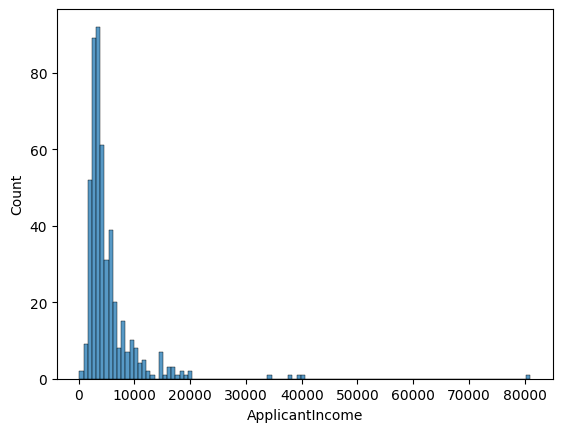

In [262]:
sns.histplot(data=df,x = df['ApplicantIncome'])
plt.show()

In [263]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,1,1,0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,1,1,0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,1,0,0,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,1,0,0,1


In [265]:
df.to_csv("drive/MyDrive/Algoritmos-AM-e-RN/MachineLearning/Projeto02- Linkedin- Regressão Logistica/LoanPredict/Dados/dados_ajustado.csv",index=False)